# Environment Setup

In [1]:
#!pip install opencv-python, gym gym-retro 

In [2]:
# Import retro to load ROM
import retro
# Import environment base class for a wrapper 
from gym import Env, ActionWrapper
# Import the space shapes for the environment
from gym.spaces import Box, Discrete
# Import numpy to calculate frame delta 
import numpy as np
# Import opencv for grayscaling
import cv2

In [3]:
# Importing ROM
!python -m retro.import .

Importing SonicTheHedgehog2-Genesis
Imported 1 games


In [4]:
class ActionDiscretizer(ActionWrapper):
    def __init__(self,env):
        super(ActionDiscretizer, self).__init__(env)
        buttons = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
        actions = [["LEFT"], ["RIGHT"], ["LEFT", "DOWN"], ["RIGHT", "DOWN"], ["DOWN"], ["DOWN", "B"], ["B"]]
        self._actions = []
        
        for action in actions:
            arr = np.array([False] * 12)
            for button in action:
                arr[buttons.index(button)] = True
            self._actions.append(arr)
        self.action_space = Discrete(len(self._actions))
        
    def action(self, a):
        return self._actions[a].copy()

In [5]:
# Creating custom environment 
class Sonic(Env): 
    
    def __init__(self):
        super().__init__()    
        # Specify observation space 
        self.observation_space = Box(low=0, high=255, shape=(100, 100, 1), dtype=np.uint8)
        # Startup and instance of the game 
        self.game = retro.make('SonicTheHedgehog2-Genesis')
    
    
    def step(self, action):
        # Take a step 
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)

        # ***Reward shaping***       
        x, lives, finishing_level, rings, kils = info["x"], info["lives"], info["level_end_bonus"], info["rings"], info["score"]

        # Calculate reward deltas
        if x > self.x:
            moving_forward_delta = -self.x + x
            self.x = x
        else:
            moving_forward_delta = 0

        lives_lost_delta = - self.lives + lives 
        self.lives = lives
        rings_delta = rings - self.rings
        self.rings = rings
        kils_delta = kils - self.kils
        self.kils = kils
        
        reward = moving_forward_delta*0.1 + lives_lost_delta*50 + rings_delta*10 + kils_delta*10 + finishing_level + self.time_ticking*0.001

        return obs, reward, done, info
    
    
    def reset(self):
        # Create game variables
        self.x = 96
        self.lives = 3
        self.rings = 0
        self.kils = 0
        self.time_ticking = -1
        
        # Return the first frame 
        obs = self.game.reset()
        obs = self.preprocess(obs) 
        
        return obs
    
    
    def preprocess(self, observation): 
        # Grayscaling 
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # Resize 
        resize = cv2.resize(gray, (100,100), interpolation=cv2.INTER_CUBIC)
        # Add the channels value
        channels = np.reshape(resize, (100,100,1))
        return channels 
    
    
    def render(self, *args, **kwargs):
        self.game.render()
        
        
    def close(self):
        self.game.close()

# Testing Environment

C:\Users\mikol\anaconda3\envs\RL45\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


0.5989999999999995
0.19799999999999918
0.19699999999999884
-0.004000000000001464
-0.4050000000000018
-0.7060000000000022
-1.1069999999999907
/nshape of screen =  (100, 100, 1)
total score =  -1.3069999999999686


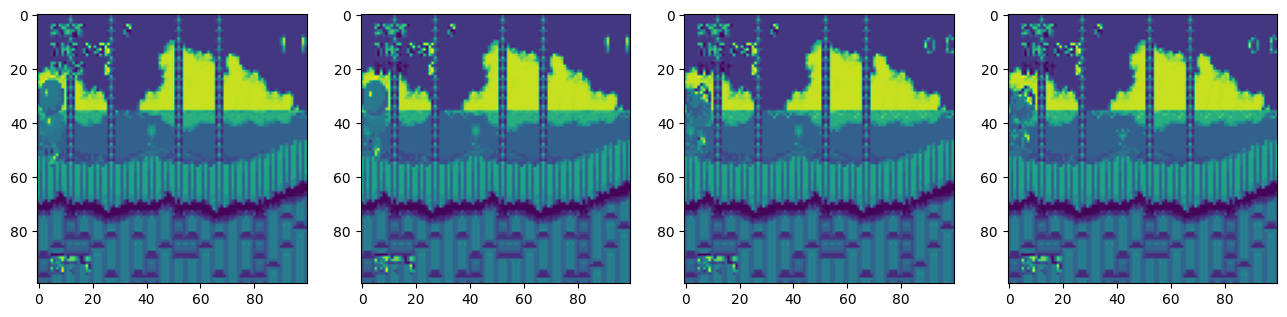

In [6]:
# Game with random actions
"""
# Creating environment
env = Sonic()
env = ActionDiscretizer(env)
    
# Importing sleep to slow down game
from time import sleep

obs = env.reset()
result = 0 

for i in range(3_000):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    result += reward
    env.render()
    sleep(0.001)
    i += 1
    if i % 400 == 0:
        result += reward
        print(result)

print("/nshape of screen = ", env.observation_space.sample().shape)
print("total score = ", result)

from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import matplotlib.pyplot as plt

env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

plt.figure(figsize=(16,9))

# Skipping some first black frames
for _ in range(6):
    obs, reward, done, info = env.step([env.action_space.sample()])
# Displaying 4 frames as movement
for i in range(obs.shape[3]):
    obs, reward, done, info = env.step([env.action_space.sample()])
    plt.subplot(1,4,i+1)
    plt.imshow(obs[0][:,:,i])
plt.show();
"""

In [7]:
"""
# All sonic levels
sonic_levels = [
    'EmeraldHillZone.Act1',
    'EmeraldHillZone.Act2',
    'ChemicalPlantZone.Act1',
    'ChemicalPlantZone.Act2',
    'AquaticRuinZone.Act1',
    'AquaticRuinZone.Act2',
    'CasinoNightZone.Act1',
    'CasinoNightZone.Act2',
    'HillTopZone.Act1',
    'HillTopZone.Act2',
    'MysticCaveZone.Act1',
    'MysticCaveZone.Act2',
    'OilOceanZone.Act1',
    'OilOceanZone.Act2',
    'MetropolisZone.Act1',
    'MetropolisZone.Act2',
    'MetropolisZone.Act3']
"""

"\n# All sonic levels\nsonic_levels = [\n    'EmeraldHillZone.Act1',\n    'EmeraldHillZone.Act2',\n    'ChemicalPlantZone.Act1',\n    'ChemicalPlantZone.Act2',\n    'AquaticRuinZone.Act1',\n    'AquaticRuinZone.Act2',\n    'CasinoNightZone.Act1',\n    'CasinoNightZone.Act2',\n    'HillTopZone.Act1',\n    'HillTopZone.Act2',\n    'MysticCaveZone.Act1',\n    'MysticCaveZone.Act2',\n    'OilOceanZone.Act1',\n    'OilOceanZone.Act2',\n    'MetropolisZone.Act1',\n    'MetropolisZone.Act2',\n    'MetropolisZone.Act3']\n"